# Using Darts predict battery SOH

## Import lib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.metrics import mape, smape, mae
from darts.dataprocessing.transformers import Scaler

## Load dataset

In [2]:
files_name = '../data/merged_data.csv'
df = pd.read_csv(files_name)
df['timestamp'] = pd.to_datetime(df['timestamp']).dt.tz_localize(None)
df = df[['timestamp', 'SOH', 'SOC', 'c0', 'ah']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9086 entries, 0 to 9085
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  9086 non-null   datetime64[ns]
 1   SOH        9086 non-null   float64       
 2   SOC        9086 non-null   float64       
 3   c0         9086 non-null   float64       
 4   ah         9086 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 355.1 KB


In [3]:
series = TimeSeries.from_dataframe(df, 'timestamp', freq='1h')
series

<TimeSeries (DataArray) (timestamp: 9288, component: 4, sample: 1)> Size: 297kB
array([[[   983.26981346],
        [   604.62055556],
        [ 11594.76667   ],
        [184549.1503    ]],

       [[   983.25864853],
        [   601.47638889],
        [ 11594.76667   ],
        [184549.1503    ]],

       [[   983.24749151],
        [   603.02333333],
        [ 11594.76667   ],
        [184549.1503    ]],

       ...,

       [[   960.49013797],
        [   494.1       ],
        [ 19610.08333   ],
        [401389.8661    ]],

       [[   960.48929551],
        [   477.01694444],
        [ 19610.08333   ],
        [401389.8661    ]],

       [[   960.48845274],
        [   493.83333333],
        [ 19610.08333   ],
        [401389.8661    ]]])
Coordinates:
  * timestamp  (timestamp) datetime64[ns] 74kB 2023-06-09T16:00:00 ... 2024-0...
  * component  (component) object 32B 'SOH' 'SOC' 'c0' 'ah'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

### Filling 

In [4]:
from darts.utils.missing_values import fill_missing_values

fill_series = fill_missing_values(series)

In [5]:
series = fill_series
series

<TimeSeries (DataArray) (timestamp: 9288, component: 4, sample: 1)> Size: 297kB
array([[[   983.26981346],
        [   604.62055556],
        [ 11594.76667   ],
        [184549.1503    ]],

       [[   983.25864853],
        [   601.47638889],
        [ 11594.76667   ],
        [184549.1503    ]],

       [[   983.24749151],
        [   603.02333333],
        [ 11594.76667   ],
        [184549.1503    ]],

       ...,

       [[   960.49013797],
        [   494.1       ],
        [ 19610.08333   ],
        [401389.8661    ]],

       [[   960.48929551],
        [   477.01694444],
        [ 19610.08333   ],
        [401389.8661    ]],

       [[   960.48845274],
        [   493.83333333],
        [ 19610.08333   ],
        [401389.8661    ]]])
Coordinates:
  * timestamp  (timestamp) datetime64[ns] 74kB 2023-06-09T16:00:00 ... 2024-0...
  * component  (component) object 32B 'SOH' 'SOC' 'c0' 'ah'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [6]:
ts_after = series[pd.Timestamp('2023-06-26T04:00:00 '):]
ts_after

<TimeSeries (DataArray) (timestamp: 8892, component: 4, sample: 1)> Size: 285kB
array([[[   980.17452099],
        [   594.38569207],
        [ 11594.76667   ],
        [184549.1503    ]],

       [[   980.16558892],
        [   591.83027778],
        [ 11603.23333   ],
        [184554.4706    ]],

       [[   980.1566634 ],
        [   585.87416667],
        [ 11603.23333   ],
        [184554.4789    ]],

       ...,

       [[   960.49013797],
        [   494.1       ],
        [ 19610.08333   ],
        [401389.8661    ]],

       [[   960.48929551],
        [   477.01694444],
        [ 19610.08333   ],
        [401389.8661    ]],

       [[   960.48845274],
        [   493.83333333],
        [ 19610.08333   ],
        [401389.8661    ]]])
Coordinates:
  * timestamp  (timestamp) datetime64[ns] 71kB 2023-06-26T04:00:00 ... 2024-0...
  * component  (component) object 32B 'SOH' 'SOC' 'c0' 'ah'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

### Scaler

In [7]:
scaler = Scaler()
scaler_series = scaler.fit_transform(ts_after)
scaler_series

<TimeSeries (DataArray) (timestamp: 8892, component: 4, sample: 1)> Size: 285kB
array([[[1.00000000e+00],
        [5.38917729e-01],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[9.99546274e-01],
        [5.36012860e-01],
        [1.05631011e-03],
        [2.45355213e-05]],

       [[9.99092882e-01],
        [5.29242248e-01],
        [1.05631011e-03],
        [2.45737982e-05]],

       ...,

       [[8.56050180e-05],
        [4.24917917e-01],
        [1.00000000e+00],
        [1.00000000e+00]],

       [[4.28104717e-05],
        [4.05498745e-01],
        [1.00000000e+00],
        [1.00000000e+00]],

       [[0.00000000e+00],
        [4.24614784e-01],
        [1.00000000e+00],
        [1.00000000e+00]]])
Coordinates:
  * timestamp  (timestamp) datetime64[ns] 71kB 2023-06-26T04:00:00 ... 2024-0...
  * component  (component) object 32B 'SOH' 'SOC' 'c0' 'ah'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [7]:

from pickle import dump

# save the scaler
dump(scaler, open('scaler.pkl', 'wb'))

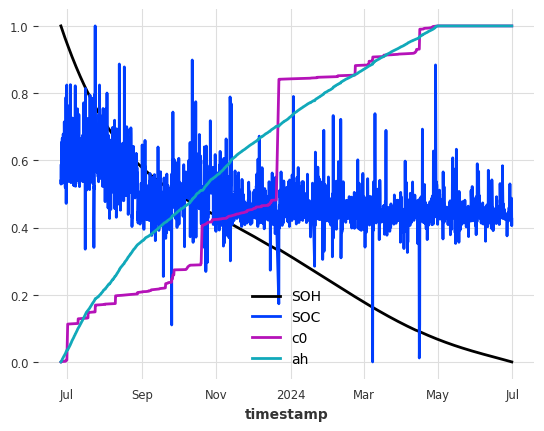

In [8]:
scaler_series.plot()
plt.show()

### Split data

In [9]:
train, test = scaler_series.split_before(0.8)

## Training data

In [25]:
from darts.models import TCNModel
model = TCNModel(
    input_chunk_length=360,
    output_chunk_length=48,
    kernel_size=7,
    num_layers=7,
    num_filters=64,
    n_epochs=500,
    batch_size=512,
)

In [18]:
from darts.models import TCNModel

input_chunk_length = 360 
output_chunk_length = 48 
num_layers = 7
kernel_size = 15
num_filters = 32 

model = TCNModel(
    input_chunk_length=input_chunk_length,
    output_chunk_length=output_chunk_length,
    kernel_size=kernel_size,
    num_layers=num_layers,
    num_filters=num_filters,
    n_epochs=100,
    batch_size=512,
    dropout=0.1,
    random_state=42,
)

In [19]:
model.fit(train)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | res_blocks    | ModuleList       | 188 K 
---------------------------------------------------
188 K     Trainable params
0         Non-trainable params
188 K     Total params
0.755     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


TCNModel(output_chunk_shift=0, kernel_size=15, num_filters=32, num_layers=7, dilation_base=2, weight_norm=False, dropout=0.1, input_chunk_length=360, output_chunk_length=48, n_epochs=100, batch_size=512, random_state=42)

## Predict

In [24]:
predictions = model.predict(n=len(test))
predictions

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

<TimeSeries (DataArray) (timestamp: 1780, component: 4, sample: 1)> Size: 57kB
array([[[ 0.07282201],
        [ 0.48250786],
        [ 0.9424072 ],
        [ 0.96838182]],

       [[ 0.07162996],
        [ 0.49591696],
        [ 0.94273264],
        [ 0.96858047]],

       [[ 0.07174203],
        [ 0.50415527],
        [ 0.93853081],
        [ 0.96896203]],

       ...,

       [[-0.01671606],
        [ 0.35752026],
        [ 1.10166389],
        [ 1.09951523]],

       [[-0.01547433],
        [ 0.35747418],
        [ 1.09898197],
        [ 1.09840798]],

       [[-0.01377504],
        [ 0.37372294],
        [ 1.09173071],
        [ 1.09655843]]])
Coordinates:
  * timestamp  (timestamp) datetime64[ns] 14kB 2024-04-17T12:00:00 ... 2024-0...
  * component  (component) object 32B 'SOH' 'SOC' 'c0' 'ah'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

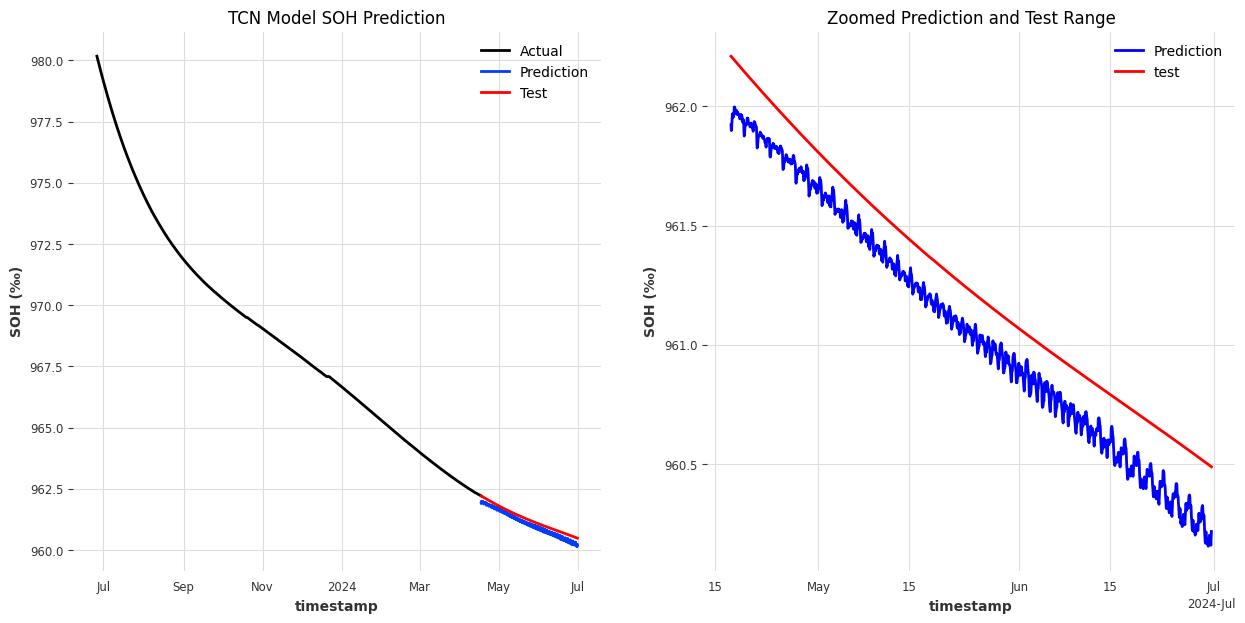

In [25]:
predictions_inverse = scaler.inverse_transform(predictions)
train_inverse = scaler.inverse_transform(train)
test_inverse = scaler.inverse_transform(test)


plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
train_inverse['SOH'].plot(label='Actual')
predictions_inverse['SOH'].plot(label='Prediction')
test_inverse['SOH'].plot(label = 'Test', color = 'red')

plt.title('TCN Model SOH Prediction')
plt.ylabel('SOH (‰)')

plt.subplot(1, 2, 2)
predictions_inverse['SOH'].plot(label='Prediction', color='blue')
test_inverse['SOH'].plot(label = 'test', color = 'red')

plt.title('Zoomed Prediction and Test Range')
plt.ylabel('SOH (‰)')

plt.legend()
plt.show()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

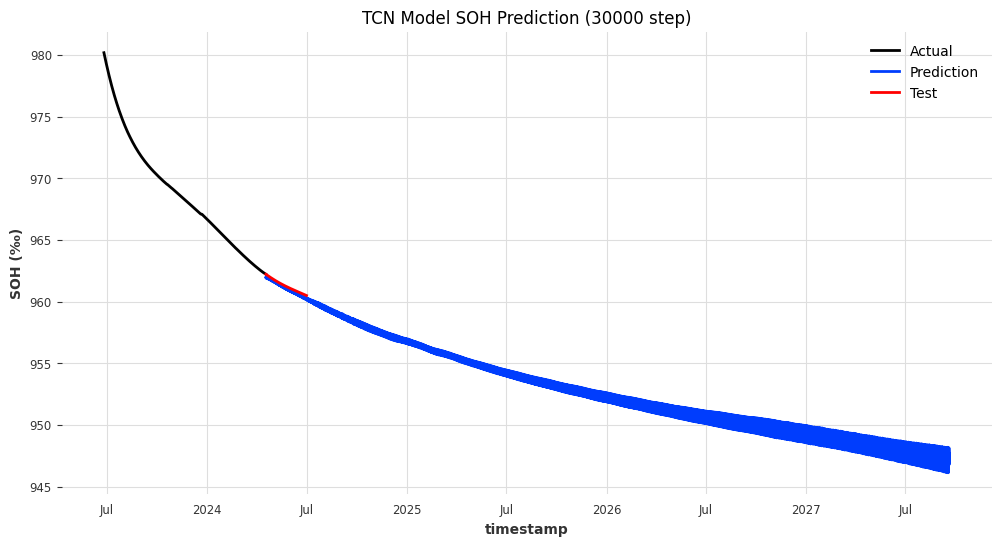

In [30]:
step = 30000
predictions = model.predict(n=step)
predictions_inverse = scaler.inverse_transform(predictions)

plt.figure(figsize=(12, 6))
train_inverse['SOH'].plot(label='Actual')
predictions_inverse['SOH'].plot(label='Prediction')
test_inverse['SOH'].plot(label = 'Test', color = 'red')

plt.title(f'TCN Model SOH Prediction ({step} step)')
plt.ylabel('SOH (‰)')
plt.legend()
plt.show()

In [16]:
from darts.metrics import mae, rmse

predict = model.predict(n=len(test))

mae_value = mae(test, predict)
rmse_value = rmse(test, predict)

print(f"MAE: {mae_value}, RMSE: {rmse_value}")

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

MAE: 0.03759624738292905, RMSE: 0.04565327170196684


In [22]:
model.save("../models/tcn_7k8y_0369.pt")

In [23]:
from darts.models import TCNModel
model_name = '../models/tcn_7k8y_0369.pt'
model = TCNModel.load(model_name)

In [55]:
def pred_res(t, p):
    absolute_array = np.abs(t-p)


    return (((absolute_array < 0.125).sum())/len(p) ) * 100


res = pred_res(test_inverse['SOH'].values(), predictions_inverse['SOH'].values())
res

85.47606239913932